In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_excel(r"C:\Users\eisha\Desktop\flightPricePrediction\Data_Train.xlsx")

In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
df.drop('Date_of_Journey',axis=1,inplace=True)

# Checking null values

In [11]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

In [14]:
df.isnull().any()

Airline            False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

# Extracting hours and mins from departure time

In [15]:
df[['Dep_Hour', 'Dep_Min']] = df['Dep_Time'].str.split(':', expand=True)

In [16]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,16,50


In [17]:
df.drop('Dep_Time',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,16,50


# Extracting arrival hour and mins from arrival time

In [18]:
df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [19]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [20]:
duration=list(df['Duration'])

# Making separate column for hour and min and extracting it from duration

In [21]:
duration_hours = [int(x.split('h')[0].strip()) if 'h' in x else 0 for x in df['Duration']]
duration_mins = [int(x.split('m')[0].split()[-1].strip()) if 'm' in x else 0 for x in df['Duration']]

In [22]:
df['Duration_hours']=duration_hours
df['Duration_mins']=duration_mins

In [23]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,09,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,16,50,21,35,4,45


In [24]:
df.drop('Duration',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,09,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,16,50,21,35,4,45


In [25]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# handling categorical data

In [26]:
Airline=df[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)

# performing one hot encoding on Source

In [27]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [28]:
Source=df[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [29]:
Destination=df[['Destination']]
Destination=pd.get_dummies(Destination, drop_first=True)

In [30]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [31]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

# performing label encoding on ordinal stops data

In [32]:
df.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)

In [33]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,09,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,16,50,21,35,4,45


In [34]:
df_final=pd.concat([df,Airline,Source,Destination],axis=1)
df_final.head()

,Airline,Source,Destination,Total_Stops,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,05,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,09,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,18,05,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [35]:
df_final.shape

(10682, 31)

In [36]:
df_final.drop(['Airline','Source','Destination'],axis=1,inplace=True)
df_final.head()

,Total_Stops,Price,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,22,20,1,10,2,50,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,05,50,13,15,7,25,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,09,25,4,25,19,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,18,05,23,30,5,25,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,16,50,21,35,4,45,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
X=df_final.drop('Price',axis=1)
y=df_final['Price']

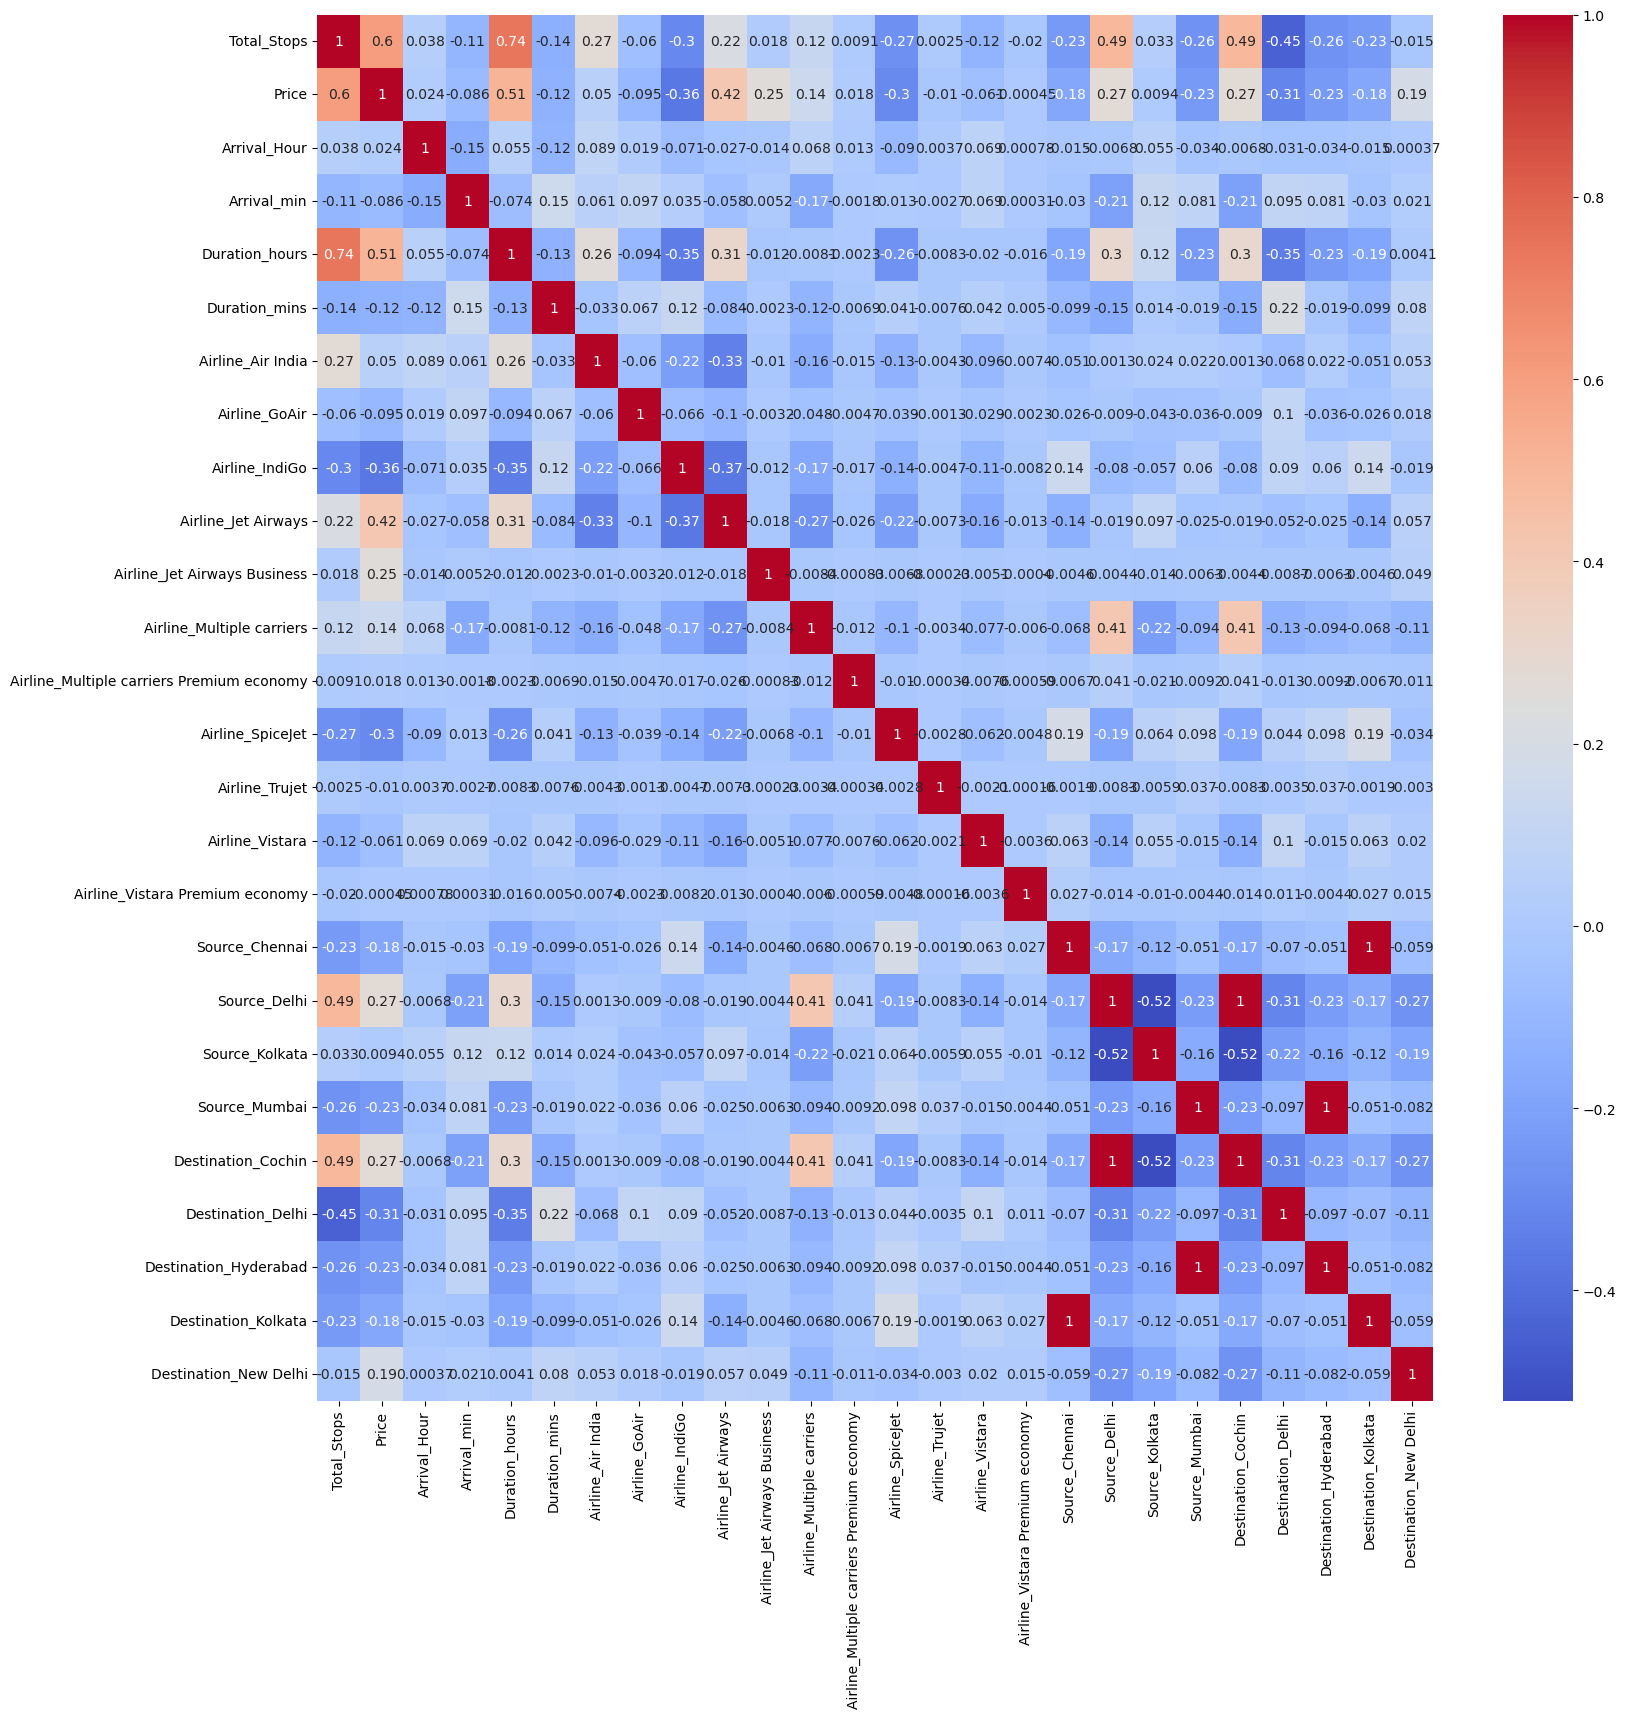

In [38]:
plt.figure(figsize=(18,18))
sns.heatmap(df_final.corr(),annot=True,cmap='coolwarm')
plt.show()

# Feature Selection using GradientBoostingRegressor

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X, y)
print(model.feature_importances_)

[6.06276315e-02 1.02902515e-02 7.67907709e-03 1.84848344e-02
 1.21764575e-02 5.88695506e-01 1.73718906e-03 1.82307121e-03
 3.49512915e-03 3.23427447e-02 8.97082873e-02 9.57407051e-02
 1.44339032e-02 2.32679713e-04 6.18538948e-03 0.00000000e+00
 1.70450723e-03 6.17524302e-05 1.22025607e-03 3.63453026e-04
 4.08857903e-03 3.46172967e-03 9.61154640e-05 9.06979731e-05
 6.36567883e-03 2.17585137e-05 3.88726152e-02]


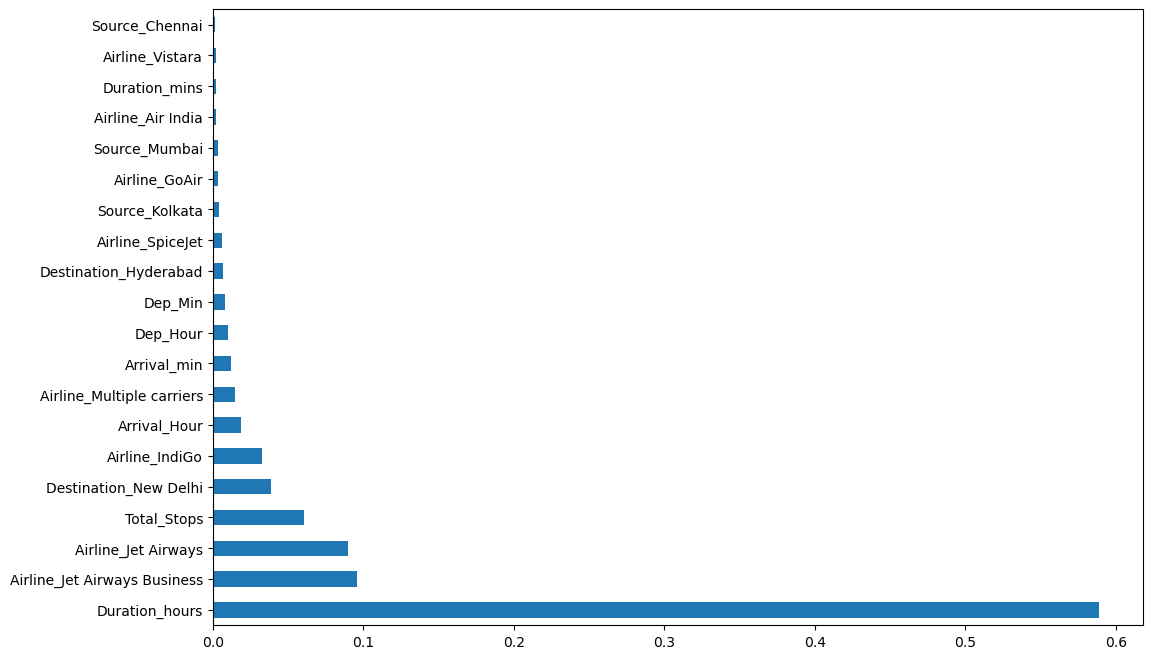

In [40]:
plt.figure(figsize=(12,8))
model=pd.Series(model.feature_importances_,index=X.columns)
model.nlargest(20).plot(kind='barh')
plt.show()

# Building Model using Random Forest

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [44]:
y_pred=model.predict(X_test)

In [45]:
model.score(X_train,y_train)

0.789068686772171

In [46]:
model.score(X_test,y_test)

0.5700910681651371

In [47]:
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [48]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
model2=RandomizedSearchCV(estimator=model, param_distributions=random_grid, scoring='neg_mean_squared_error',n_iter=10, cv=4)

In [56]:
model2.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error')

In [57]:
prediction=model.predict(X_test)

In [58]:
from sklearn import metrics
print(metrics.r2_score(y_test,prediction))

0.5700910681651371


Predicting flight ticket costs can pose a challenge; what we observe today may not align with tomorrow's prices, creating an unpredictable scenario. Travelers frequently says that the unpredictable nature of flight ticket pricing.

This analysis tackles the machine learning task of forecasting flight ticket prices using various independent features